# Manuscript Figures 2-5

Code using analytic results to consider differences between network and mean-field models, as well as different possibilities for total benefits, with infections counted as negative benefit

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import warnings
warnings.simplefilter("ignore") # Best to comment this out during development

colour_set = ['#398564', '#fc3468', '#107dac', '#c68642', '#800080']

# Model parameters

In [2]:
# Parameters for all figures
maxmeanlink = 20
tau = 0.50
tau_arr = np.array([0.10, 0.25, tau])
gamma = 1

# Parameters for Figure 4 and 5
alpha = 12.
b = 1.1
n50 = 2

In [3]:
meanlink_range = np.arange(0.1, maxmeanlink, 0.1)
meanlink_nreg_range = np.arange(0, maxmeanlink+1)
meanlink_geom_range = np.arange(1, maxmeanlink, 0.1)

# Benefit functions (Hill functions and distributions on them)

In [4]:
def benefit_FOM(x, alpha, b, n50):
    B = (b * (x**alpha)) / ( (x**alpha) + (n50**alpha) )
    return B

def benefit_MOF_poisdist(x, bff):
    poisdist = st.poisson(mu = x)
    maxdeg = poisdist.isf(1e-9)
    netdeg = np.arange(0, maxdeg)
    pk = poisdist.pmf(k = netdeg)
    return np.sum( pk * bff(netdeg) )

def benefit_MOF_geomdist(x, bff):
    geomdist = st.geom(p = 1./x)
    maxdeg = geomdist.isf(1e-5)
    netdeg = np.arange(0, maxdeg)
    pk = geomdist.pmf(k = netdeg)
    return np.sum( pk * bff(netdeg) )

# Cost functions derived from pairwise model

In [5]:
def cost_func_MF(x, tau, gamma):
    cost_MF = 1 - gamma / (x * tau)
    cost_MF[x < gamma/tau] = 0
    return cost_MF

def cost_func_ER(x, tau, gamma):
    cost_ER = (1/2)*( x + 1 - ( 4*gamma/tau + (x-1)**2 )**(1/2) )
    cost_ER[x < gamma/tau] = 0
    return cost_ER
def cost_func_nreg(x, tau, gamma):
    cost_nreg = x* ( gamma - tau*(x-1) )/( gamma - x*tau*(x-1) )
    cost_nreg[x < gamma/tau+1] = 0
    return cost_nreg
def cost_func_geom(x, tau, gamma):
    numer_geom = -gamma*(x-2) - tau*(x**2-1) + (x-1)*( 4*gamma*tau*(x-1)+tau**2*(x-1)**2 )**(1/2)
    denom_geom = gamma*(x-2)**2 - 2*x*tau*(x-1)
    cost_geom = x*numer_geom / denom_geom
    cost_geom[x < gamma/(2*tau)+1] = 0
    return cost_geom

# Figure 2: Difference in endemic prevalence

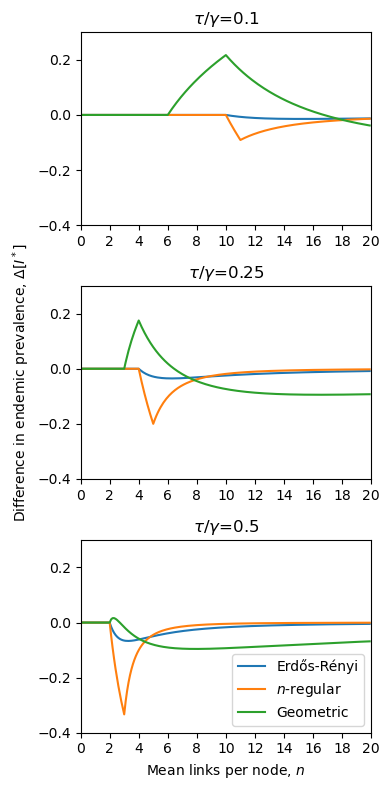

In [6]:
fig_diff_Istar, axs_diff_Istar = plt.subplots(3, 1, figsize=(4, 8))
for ax in axs_diff_Istar.flat:
    ax.set_xticks(np.arange(0, maxmeanlink+1, 2))
    ax.set_ylim([-0.4, 0.3])
    ax.set_xlim([0, maxmeanlink])
axs_diff_Istar[1].set(ylabel=r'Difference in endemic prevalence, $\Delta [I^*]$')
axs_diff_Istar[2].set(xlabel=r'Mean links per node, $n$')

for tau_index in np.arange(len(tau_arr)):
    axs_diff_Istar[tau_index].plot(meanlink_range,
                                   cost_func_ER(meanlink_range, tau_arr[tau_index], gamma) - cost_func_MF(meanlink_range, tau_arr[tau_index], gamma),
                                   label=r'Erdős-Rényi')
    axs_diff_Istar[tau_index].plot(meanlink_range,
                                   cost_func_nreg(meanlink_range, tau_arr[tau_index], gamma) - cost_func_MF(meanlink_range, tau_arr[tau_index], gamma),
                                   label=r'$n$-regular')
    axs_diff_Istar[tau_index].plot(meanlink_range,
                                   cost_func_geom(meanlink_range, tau_arr[tau_index], gamma) - cost_func_MF(meanlink_range, tau_arr[tau_index], gamma),
                                   label=r'Geometric')
    axs_diff_Istar[tau_index].set_title(r'$\tau/\gamma$='+str(tau_arr[tau_index]/gamma))
plt.legend(loc='lower right')

plt.tight_layout()

# Figure 3: Cost of infection compared among networks

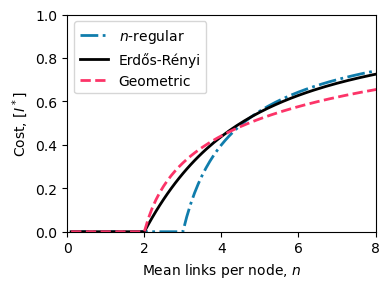

In [7]:
fig_cost, ax_cost = plt.subplots(figsize=(4,3))

ax_cost.plot(meanlink_range, cost_func_nreg(meanlink_range, tau, gamma), color=colour_set[2], linestyle='-.', linewidth=2, label=r'$n$-regular')
ax_cost.plot(meanlink_range, cost_func_ER(meanlink_range, tau, gamma), 'k', linewidth=2, label=r'Erdős-Rényi')
ax_cost.plot(meanlink_range, cost_func_geom(meanlink_range, tau, gamma), color=colour_set[1], linestyle='--', linewidth=2, label=r'Geometric')
plt.legend(loc='upper left')
plt.xlabel(r'Mean links per node, $n$')
plt.ylabel('Cost, $[I^*]$')
plt.xlim([0, 8])
plt.ylim([0, 1])
plt.tight_layout()

# Figure 4: Benefit of interaction function
- Function of mean links (FOM)
- Mean of benefit function of interaction for each network (MOF)

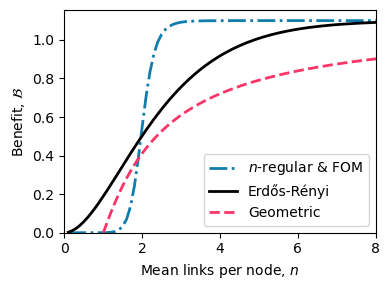

In [8]:
MOF_pois_range = np.zeros(len(meanlink_range))
MOF_geom_range = np.zeros(len(meanlink_geom_range))

bf = lambda x: benefit_FOM(x, alpha, b, n50)

for i in range(len(meanlink_range)):
    MOF_pois_range[i] = benefit_MOF_poisdist(meanlink_range[i],bf)
for i in range(len(meanlink_geom_range)):
    MOF_geom_range[i] = benefit_MOF_geomdist(meanlink_geom_range[i],bf)
FOM = bf(meanlink_range)

fig_benefit, ax_benefit = plt.subplots(figsize=(4, 3))
ax_benefit.plot(meanlink_range, FOM, color=colour_set[2], linestyle='-.', linewidth=2, label=r'$n$-regular & FOM')
ax_benefit.plot(meanlink_range, MOF_pois_range, 'k', linewidth=2, label=r'Erdős-Rényi')
ax_benefit.plot(meanlink_geom_range, MOF_geom_range, color=colour_set[1], linestyle='--', linewidth=2, label=r'Geometric')
plt.legend(loc='lower right')
plt.xlabel(r'Mean links per node, $n$')
plt.ylabel('Benefit, $\mathcal{B}$')
plt.xlim([0, 8])
plt.ylim([0, 1.05*b])
plt.tight_layout()

# Figure 5: Total cost-benefit values compared between two benefit functions

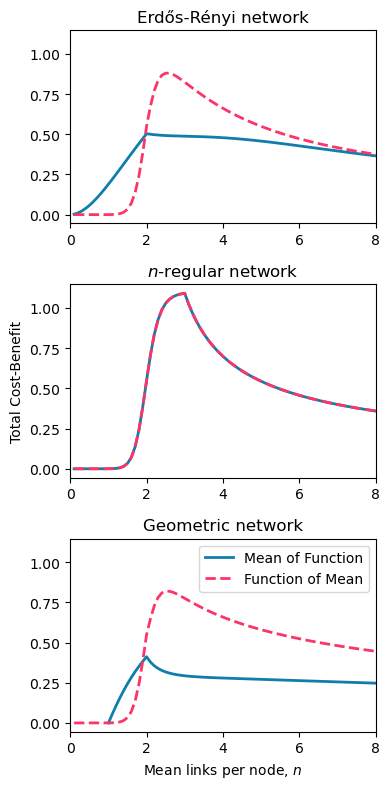

In [9]:
fig, ax = plt.subplots(3, 1, figsize=(4, 8), sharey=True)

ax_pois = ax[0]
ax_pois.plot(meanlink_range,
             MOF_pois_range - cost_func_ER(meanlink_range, tau, gamma),
             color=colour_set[2], linewidth=2, label=r'Mean of Function')
ax_pois.plot(meanlink_range,
             bf(meanlink_range) - cost_func_ER(meanlink_range, tau, gamma),
             color=colour_set[1], linestyle='--', linewidth=2, label=r'Function of Mean',)
ax_pois.set_xticks(np.arange(0, maxmeanlink+1, 2))
ax_pois.set_xlim([0, 8])
ax_pois.set_title(r'Erdős-Rényi network')

ax_nreg =  ax[1]
ax_nreg.set_ylabel('Total Cost-Benefit')
ax_nreg.plot(meanlink_range,
             bf(meanlink_range) - cost_func_nreg(meanlink_range, tau, gamma),
             color=colour_set[2], linewidth=2,label=r'Mean of Function')
ax_nreg.plot(meanlink_range,
             bf(meanlink_range) - cost_func_nreg(meanlink_range, tau, gamma),
             color=colour_set[1], linestyle='--', linewidth=2, label=r'Function of Mean',)
ax_nreg.set_xticks(np.arange(0, maxmeanlink+1, 2))
ax_nreg.set_xlim([0, 8])
ax_nreg.set_title(r'$n$-regular network')

ax_geom = ax[2]
ax_geom.set_xlabel(r'Mean links per node, $n$')
ax_geom.plot(meanlink_geom_range,
             MOF_geom_range - cost_func_geom(meanlink_geom_range, tau, gamma),
             color=colour_set[2], linewidth=2, label=r'Mean of Function')
ax_geom.plot(meanlink_range,
             bf(meanlink_range) - cost_func_geom(meanlink_range, tau, gamma),
             color=colour_set[1], linestyle='--', linewidth=2, label=r'Function of Mean',)
ax_geom.set_xticks(np.arange(0, maxmeanlink+1, 2))
ax_geom.set_xlim([0, 8])
ax_geom.set_title(r'Geometric network')
ax_geom.legend(loc='upper right')

plt.tight_layout()